In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']= 10,6

In [2]:
path =r'C:\Users\GAURI TOSHNIWAL\Documents\DARPG Hackathon\DataSet-MonthwiseReceiptsDisposal_1.csv'
df = pd.read_csv(path)

In [3]:
df.drop('Disposals',axis=1,inplace=True)

In [4]:
df.head()

,org_name,Year,Month,Recetpts
0,Central Board of Direct Taxes (Income Tax),2016,1,1600
1,Central Board of Direct Taxes (Income Tax),2016,2,2106
2,Central Board of Direct Taxes (Income Tax),2016,3,2465
3,Central Board of Direct Taxes (Income Tax),2016,4,1912
4,Central Board of Direct Taxes (Income Tax),2016,5,2797


In [5]:
df['Date']= pd.to_datetime(df['Year'].astype(str) + "-" + df['Month'].astype(str),format='%Y-%d')

In [6]:
df.head()

,org_name,Year,Month,Recetpts,Date
0,Central Board of Direct Taxes (Income Tax),2016,1,1600,2016-01-01
1,Central Board of Direct Taxes (Income Tax),2016,2,2106,2016-01-02
2,Central Board of Direct Taxes (Income Tax),2016,3,2465,2016-01-03
3,Central Board of Direct Taxes (Income Tax),2016,4,1912,2016-01-04
4,Central Board of Direct Taxes (Income Tax),2016,5,2797,2016-01-05


In [7]:
df.drop('Year',axis=1,inplace=True)

In [8]:
df.drop('Month',axis=1,inplace=True)

In [9]:
l = ['Ministry of Ayush']
df_ayush = df.loc[df['org_name'].isin(l)]

In [10]:
df_ayush.set_index('Date',inplace=True)

In [11]:
df_ayush.head()

,org_name,Recetpts
Date,,
2016-01-01,Ministry of Ayush,87
2016-01-02,Ministry of Ayush,130
2016-01-03,Ministry of Ayush,139
2016-01-04,Ministry of Ayush,122
2016-01-05,Ministry of Ayush,128


In [12]:
df_ayush.drop('org_name',axis=1,inplace=True)

C:\Users\GAURI TOSHNIWAL\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [13]:
df_ayush.head()

,Recetpts
Date,
2016-01-01,87
2016-01-02,130
2016-01-03,139
2016-01-04,122
2016-01-05,128


C:\Users\GAURI TOSHNIWAL\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


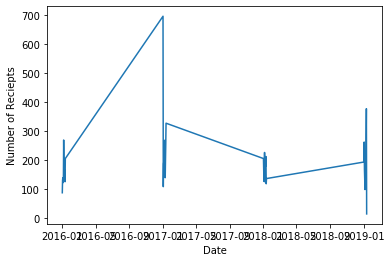

In [14]:
plt.xlabel('Date')
plt.ylabel("Number of Reciepts")
plt.plot(df_ayush)

In [15]:
#rolling Statistics test
rolmean = df_ayush.rolling(window=12).mean()
rolstd = df_ayush.rolling(window=12).std()
#print(rolmean,rolstd)

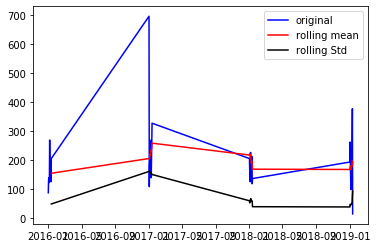

In [16]:
#rolling statistics
orig = plt.plot(df_ayush,color='blue',label='original')
mean = plt.plot(rolmean,color='red',label='rolling mean')
std = plt.plot(rolstd,color='black',label='rolling Std')
plt.legend(loc='best')
plt.show(block =False)

In [17]:
#perform dickey-fuller test
from statsmodels.tsa.stattools import adfuller
print('results of dickey fuller test:')
dftest = adfuller(df_ayush['Recetpts'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','number of observation used'])
for key,value in dftest[4].items():
    dfoutput['critical values (%s)'%key]=value
print(dfoutput)    
    
    

results of dickey fuller test:
Test Statistic               -6.749458e+00
p-value                       2.976596e-09
#Lags used                    0.000000e+00
number of observation used    4.600000e+01
critical values (1%)         -3.581258e+00
critical values (5%)         -2.926785e+00
critical values (10%)        -2.601541e+00
dtype: float64


Text(0.5, 1.0, 'Autocorrelation function')

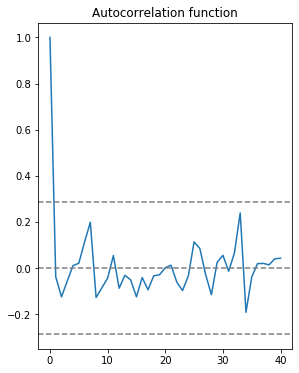

In [46]:
#ACF & PACF
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(df_ayush, nlags = 40)
lag_pacf = pacf(df_ayush,nlags=40,method ='ols')

#plot ACF:
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_ayush)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_ayush)),linestyle='--',color='gray')
plt.title('Autocorrelation function')

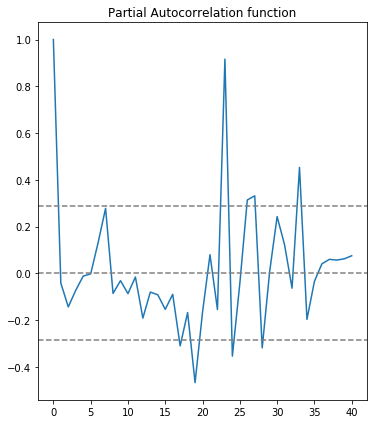

In [44]:
#plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_ayush)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_ayush)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation function')
plt.tight_layout()

C:\Users\GAURI TOSHNIWAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


plotting AR model


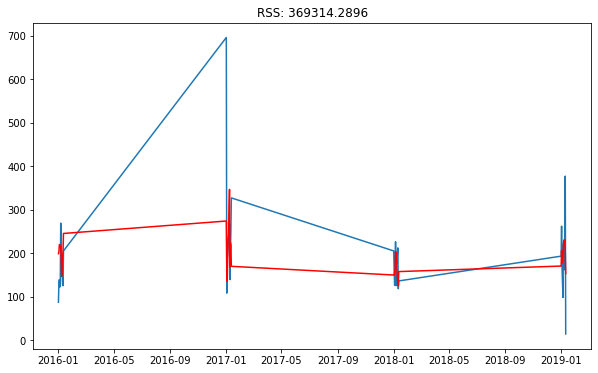

In [45]:
from statsmodels.tsa.arima_model import ARIMA
#AR Model
model = ARIMA(df_ayush,order=(11,0,1))
results_AR = model.fit(disp=-1)
plt.plot(df_ayush)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df_ayush['Recetpts'])**2))
print('plotting AR model')

C:\Users\GAURI TOSHNIWAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


plotting AR model


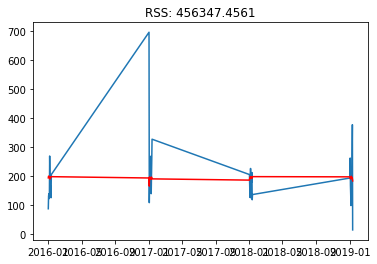

In [41]:
#MA model
model = ARIMA(df_ayush,order=(0,0,1))
results_MA = model.fit(disp=-1)
plt.plot(df_ayush)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-df_ayush['Recetpts'])**2))
print('plotting MA model')

C:\Users\GAURI TOSHNIWAL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 369314.2896')

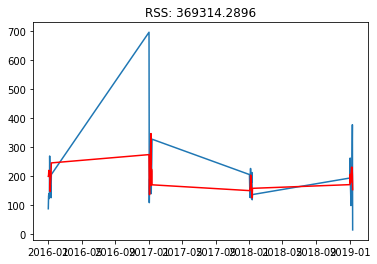

In [42]:
model = ARIMA(df_ayush,order=(11,0,1))
results_ARIMA = model.fit(disp=-1)
plt.plot(df_ayush)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_ayush['Recetpts'])**2))


In [47]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2016-01-01    198.765746
2016-01-02    203.398080
2016-01-03    219.549660
2016-01-04    218.950426
2016-01-05    214.610176
dtype: float64
